In [5]:
from pm4py.objects.process_tree.importer import importer as ptml_importer

from pm4py.algo.simulation.playout.process_tree import algorithm as tree_playout

from pm4py.visualization.process_tree import visualizer as pt_visualizer

from pm4py.objects.conversion.process_tree import converter as pt_converter

from pm4py.visualization.petri_net import visualizer as pn_visualizer

from pm4py.objects.petri_net.exporter import exporter as pnml_exporter


In [6]:
def get_percentages_tree(tree):
    seq = str(tree).count('->')
    par = str(tree).count('+')
    cho = str(tree).count('X')
    return ([(seq/(seq+par+cho)), (cho/(seq+par+cho)), (par/(seq+par+cho))])

In [7]:
def get_alphabet(net):
    activities = list({a.label for a in net.transitions if a.label and not '_' in a.label})
    return activities

------------------- PARALLEL: 0.0 -------------------
percentages sequence, choice, parallel [0.5, 0.5, 0.0]
Number of variants: 96
Min length:  7
Max length:  9


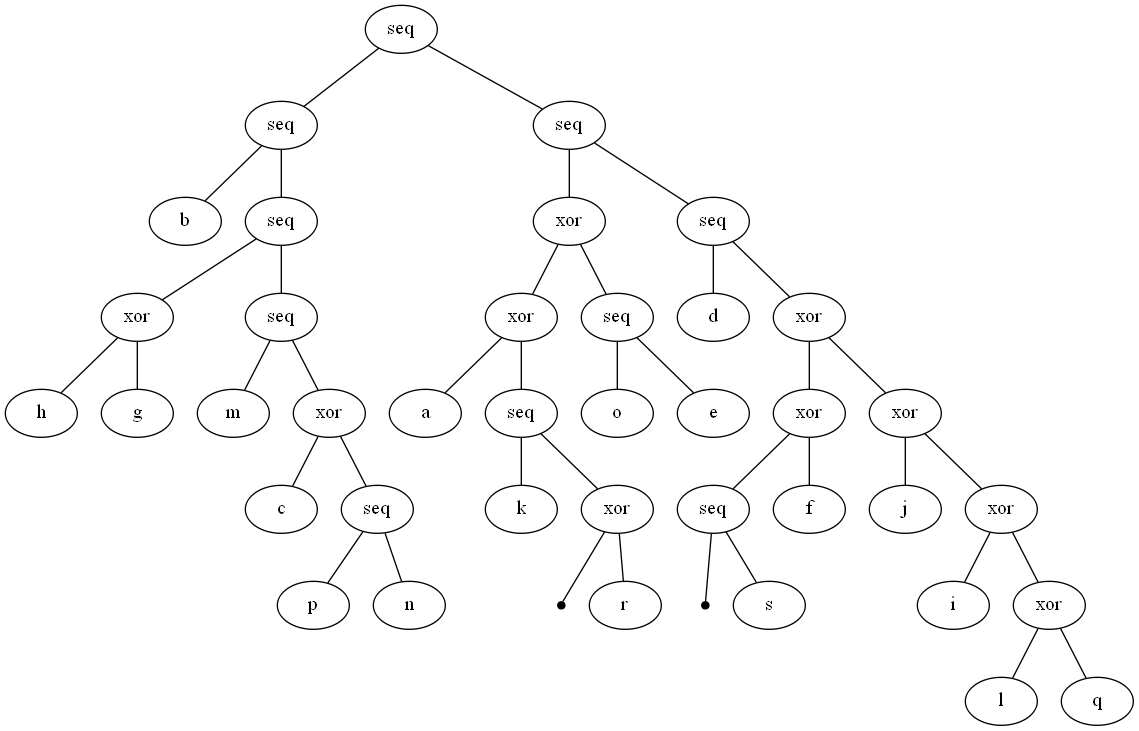

Number of act.: 19


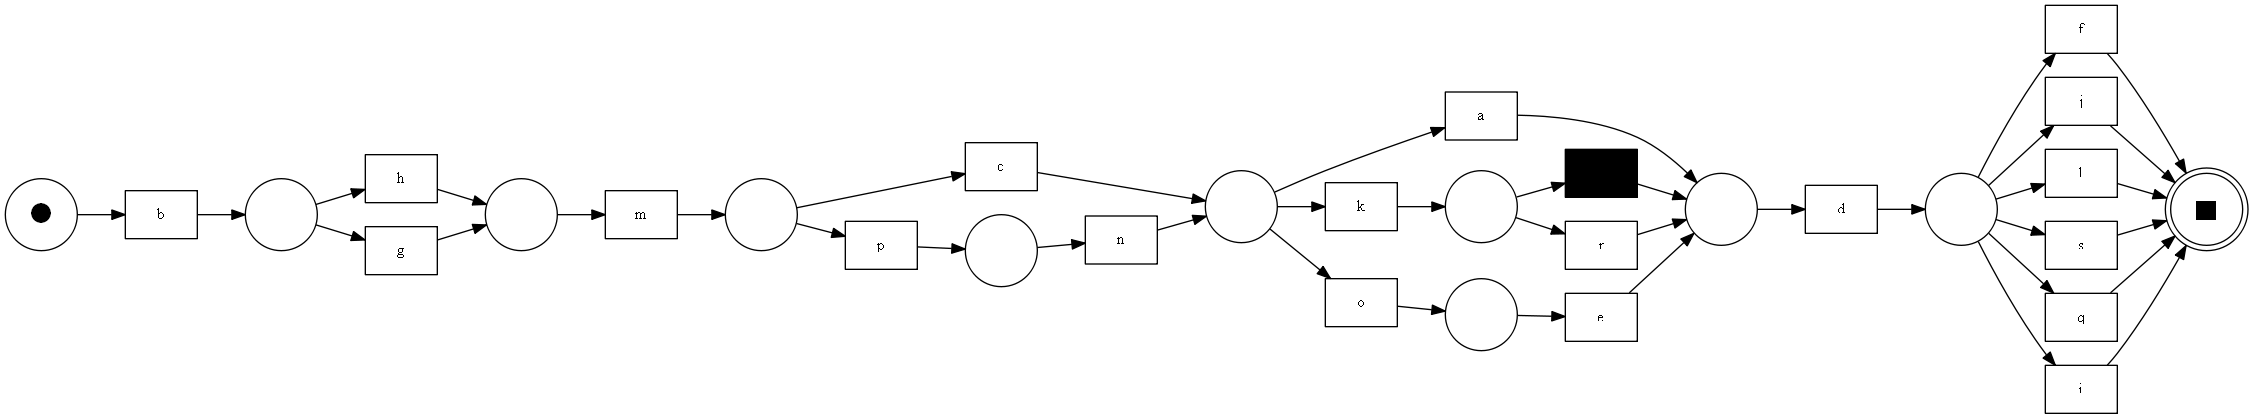

------------------- PARALLEL: 0.05 -------------------
percentages sequence, choice, parallel [0.5, 0.45, 0.05]
Number of variants: 108
Min length:  6
Max length:  10


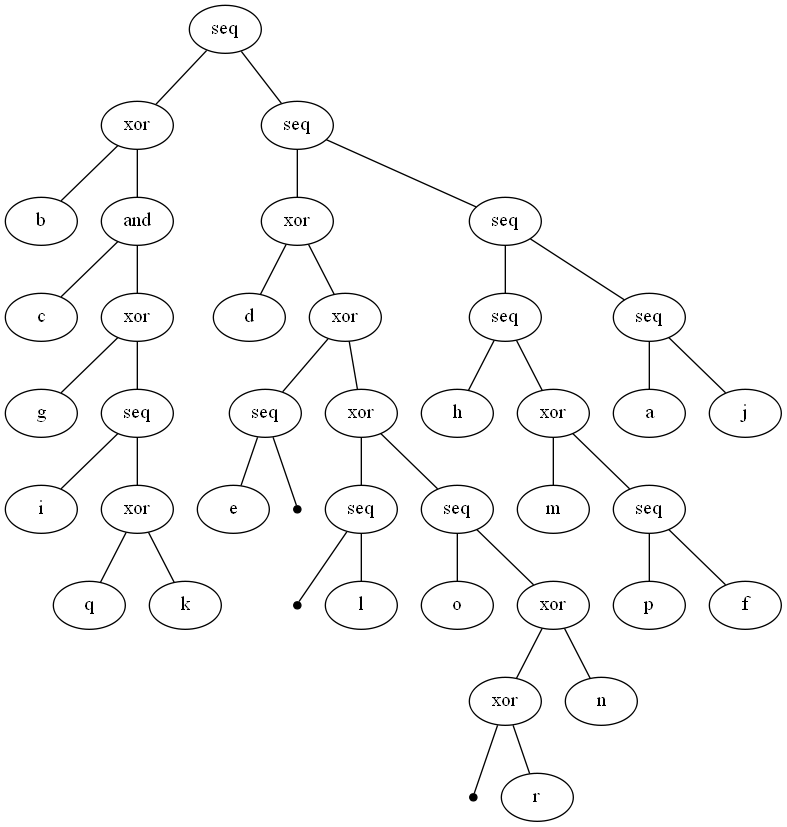

Number of act.: 18


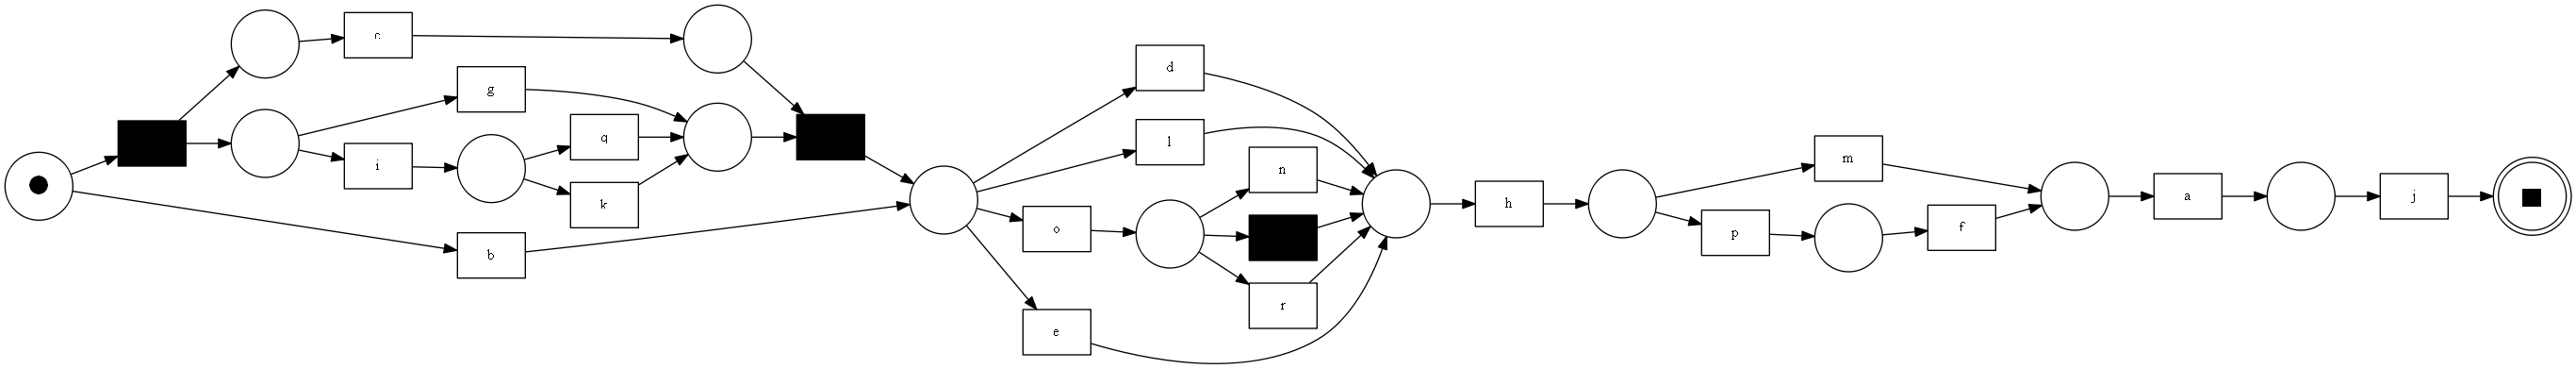

------------------- PARALLEL: 0.1 -------------------
percentages sequence, choice, parallel [0.5, 0.4, 0.1]
Number of variants: 120
Min length:  7
Max length:  9


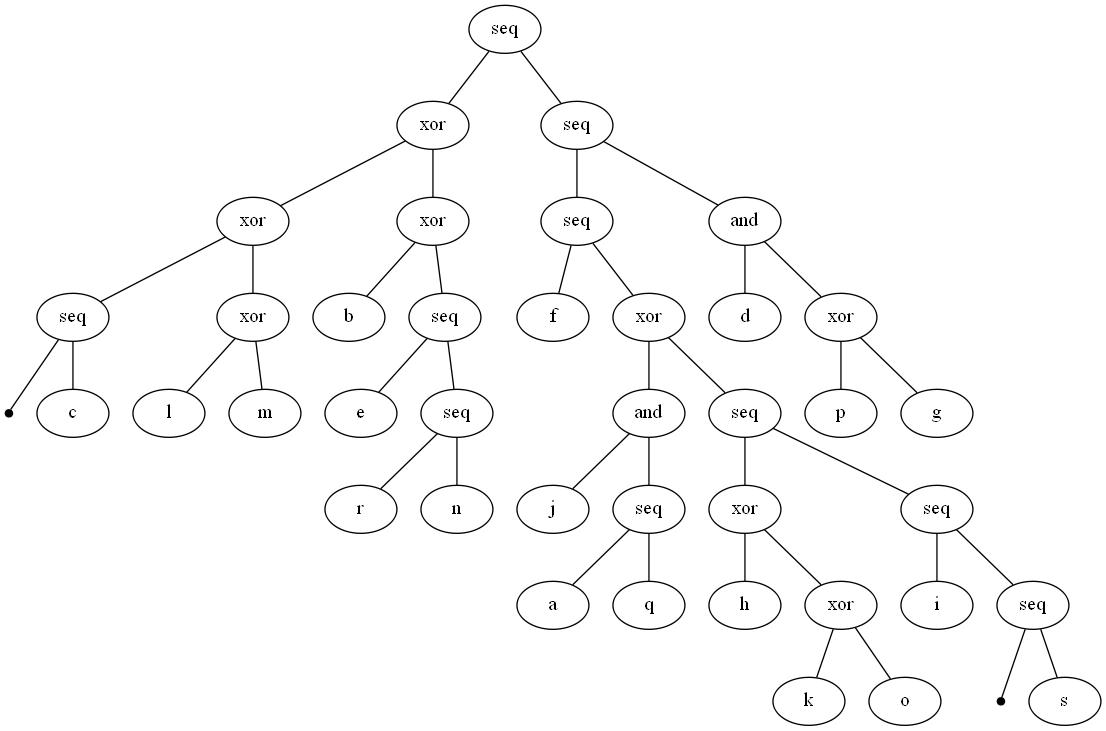

Number of act.: 19


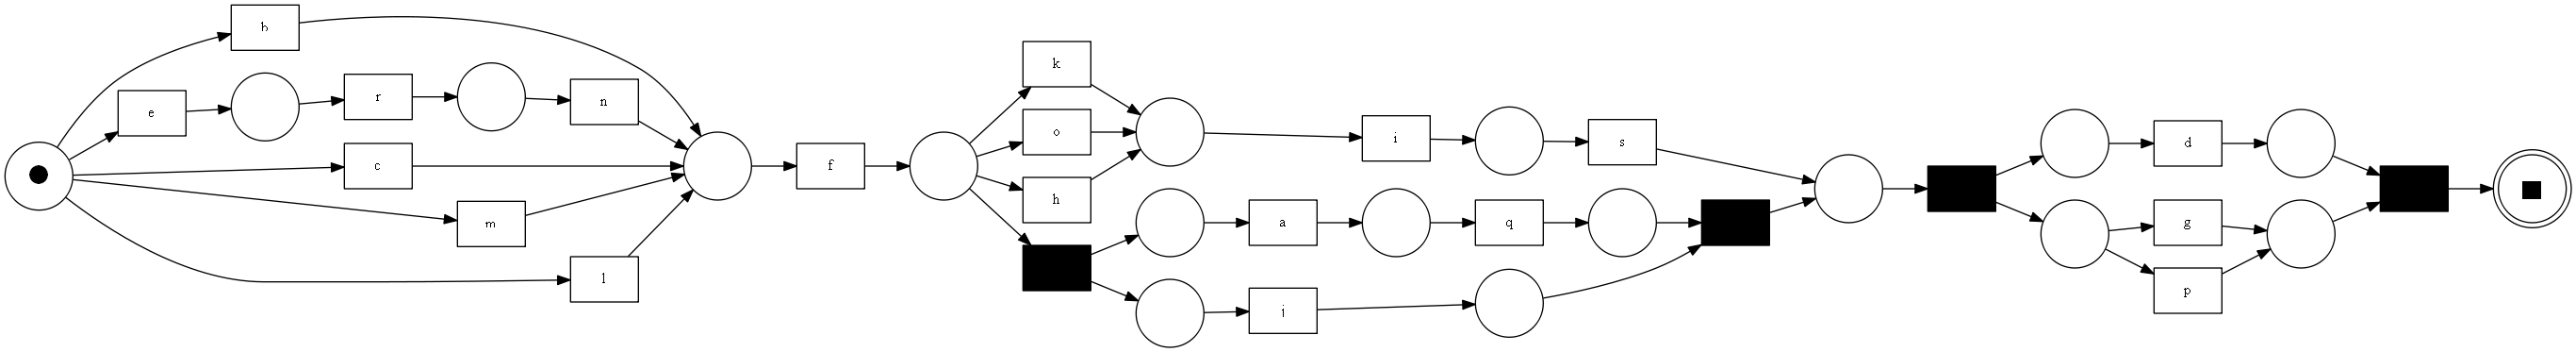

------------------- PARALLEL: 0.15 -------------------
percentages sequence, choice, parallel [0.5, 0.35, 0.15]
Number of variants: 150
Min length:  7
Max length:  11


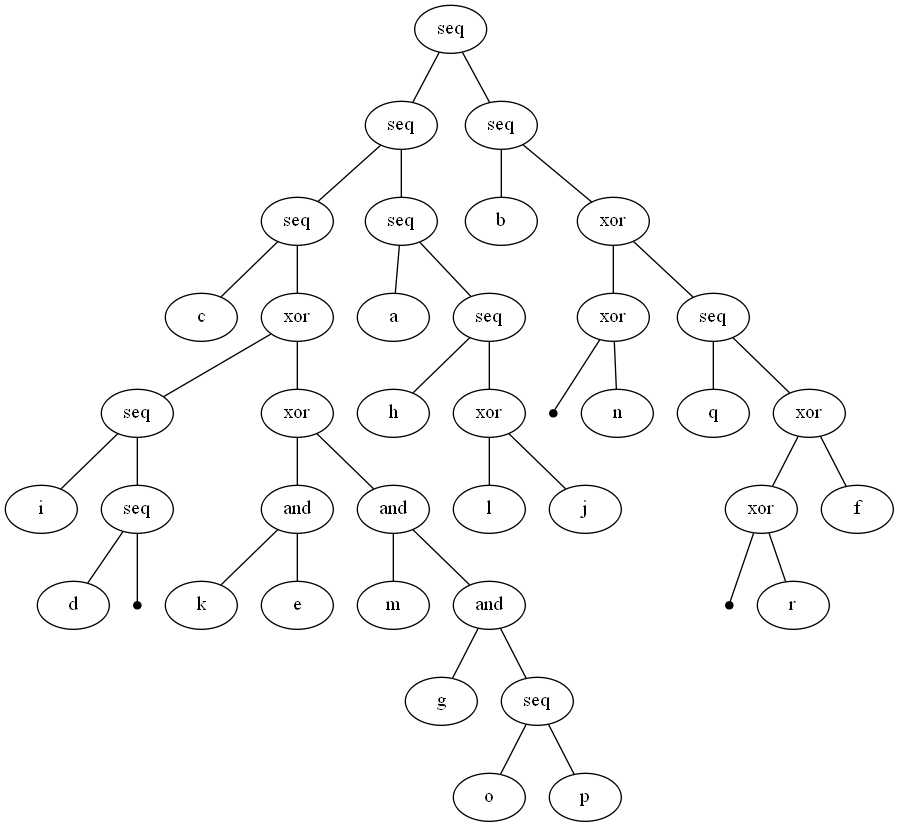

Number of act.: 18


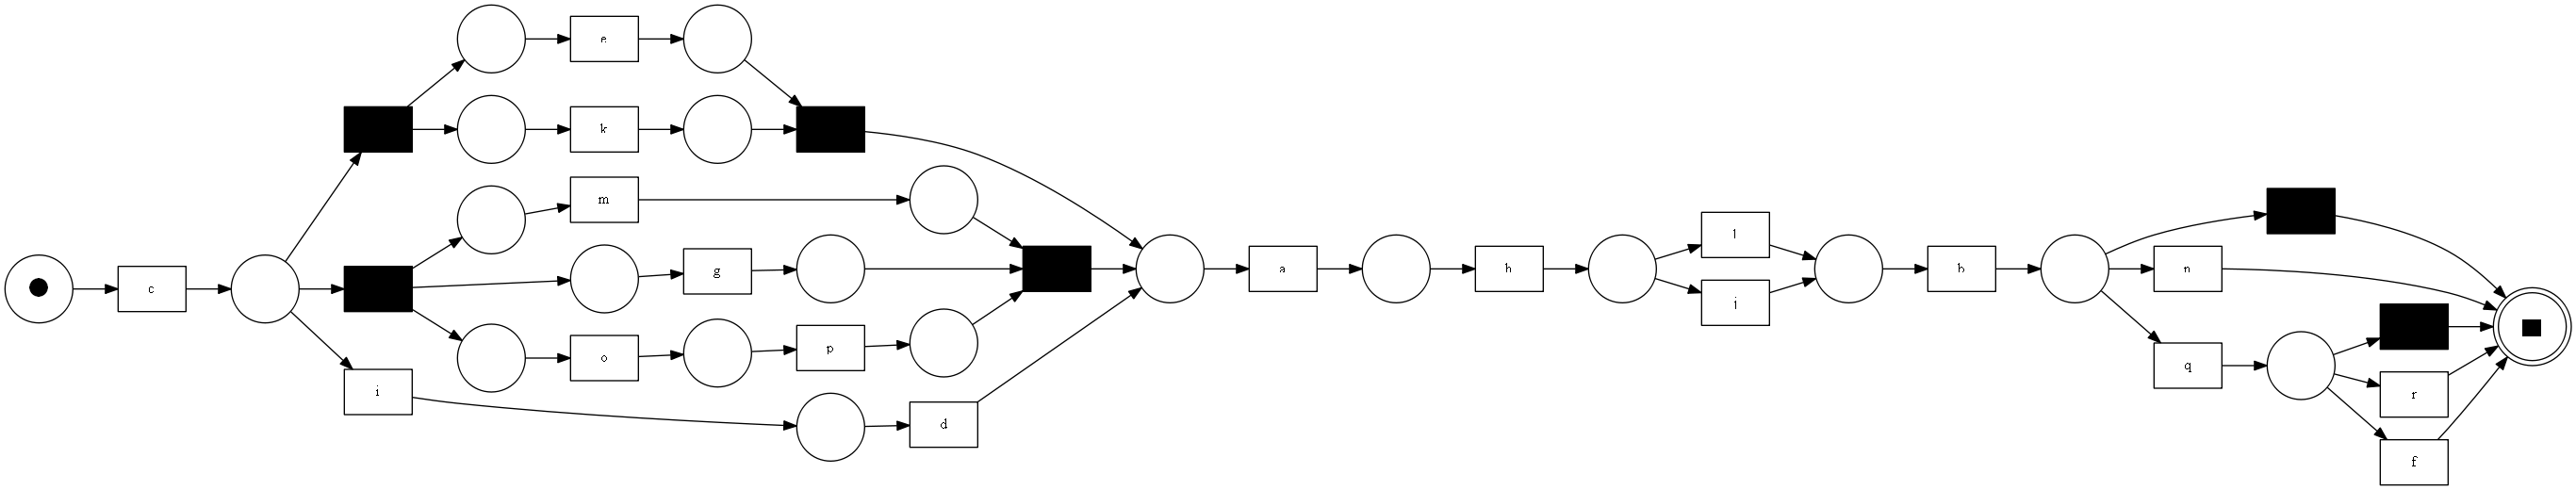

------------------- PARALLEL: 0.2 -------------------
percentages sequence, choice, parallel [0.5, 0.3, 0.2]
Number of variants: 136
Min length:  8
Max length:  10


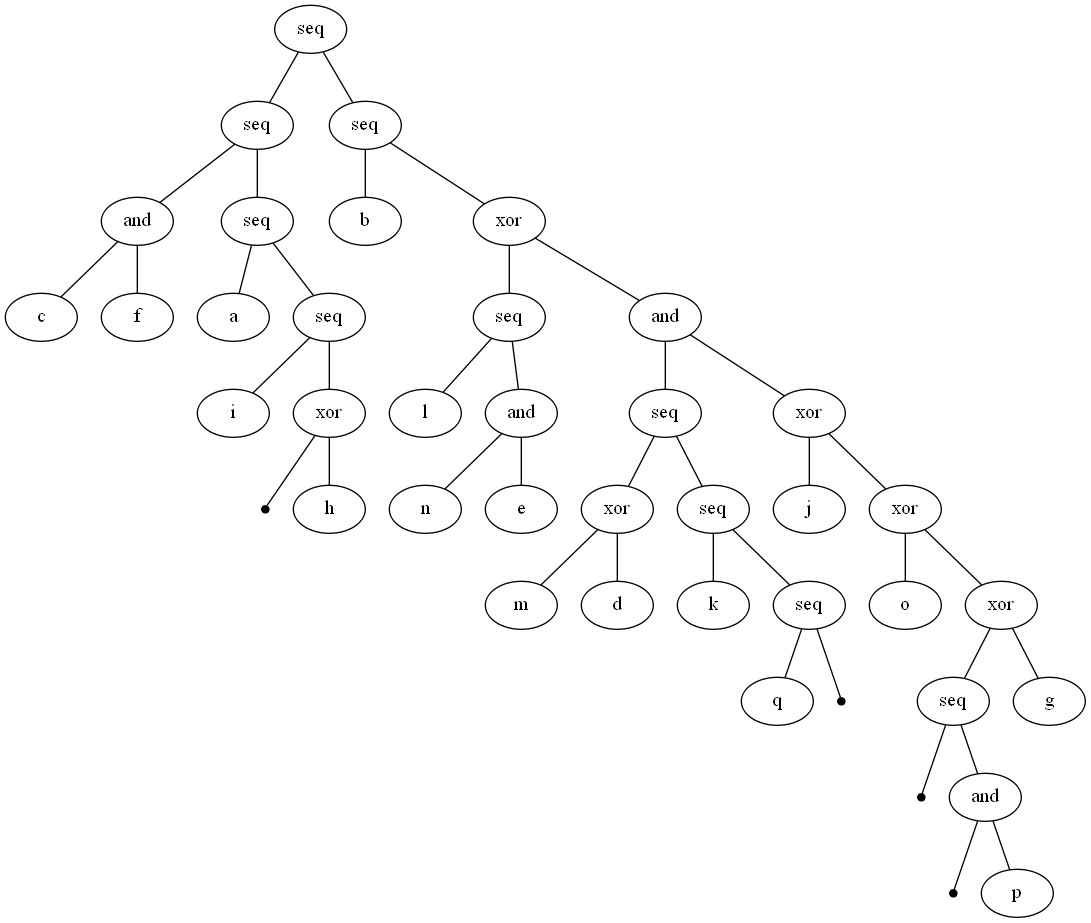

Number of act.: 17


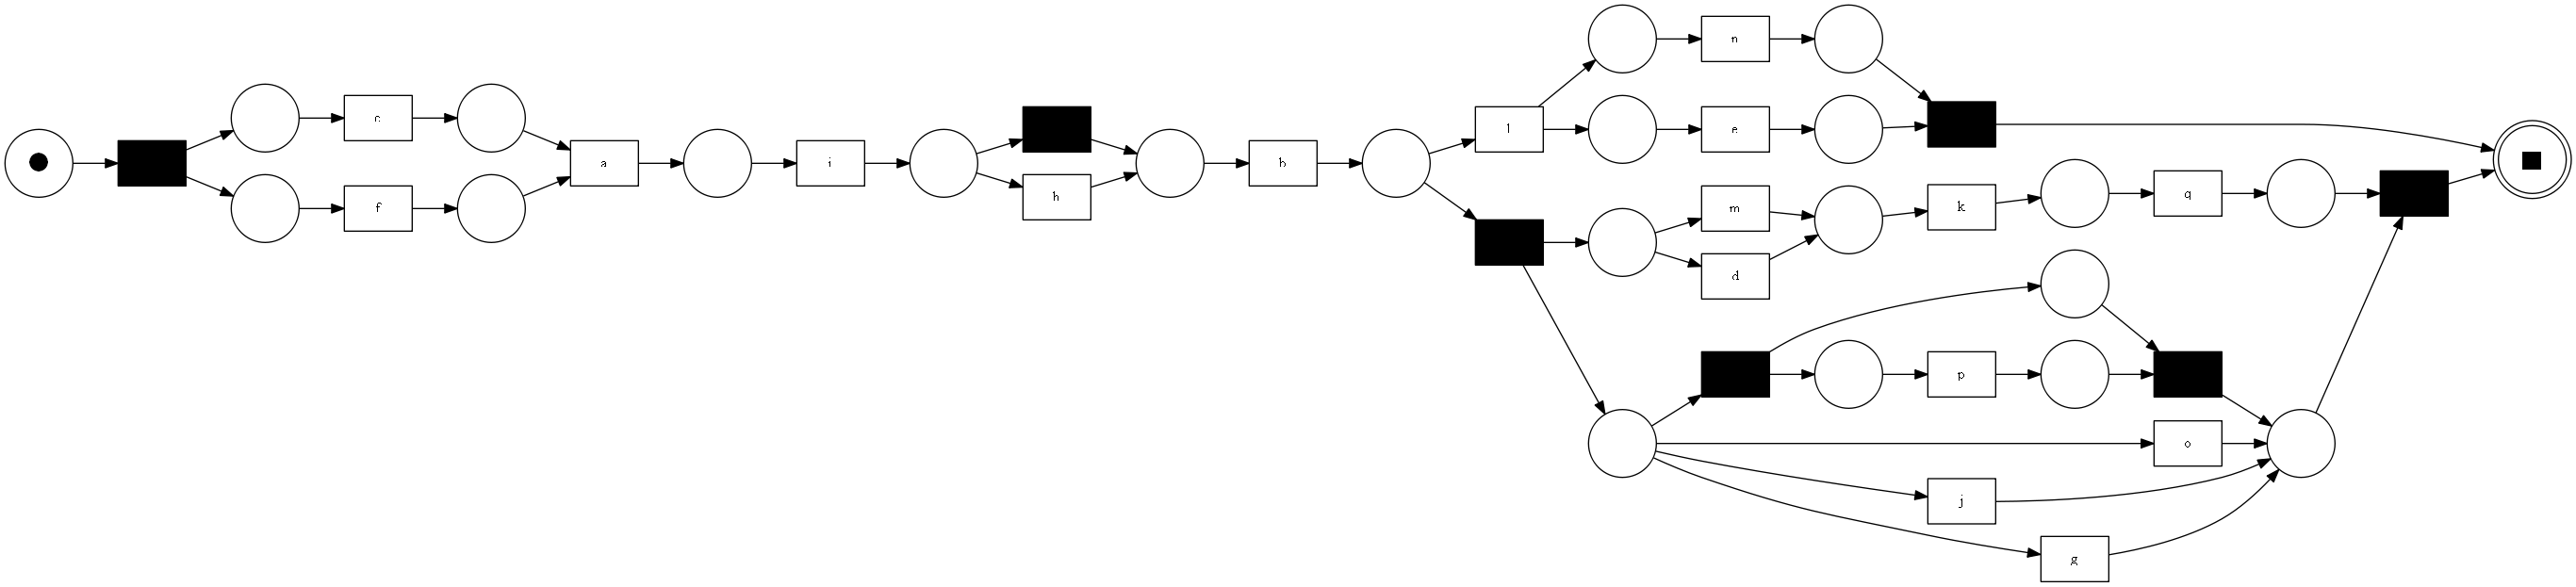

------------------- PARALLEL: 0.25 -------------------
percentages sequence, choice, parallel [0.5, 0.25, 0.25]
Number of variants: 108
Min length:  6
Max length:  8


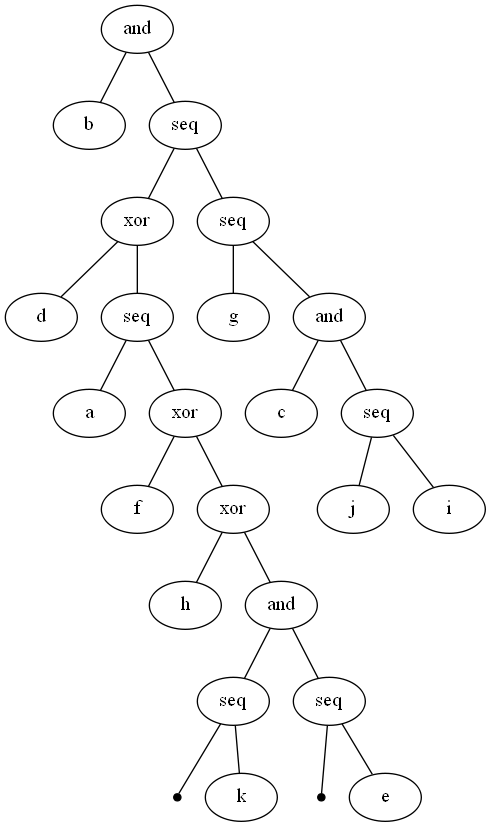

Number of act.: 11


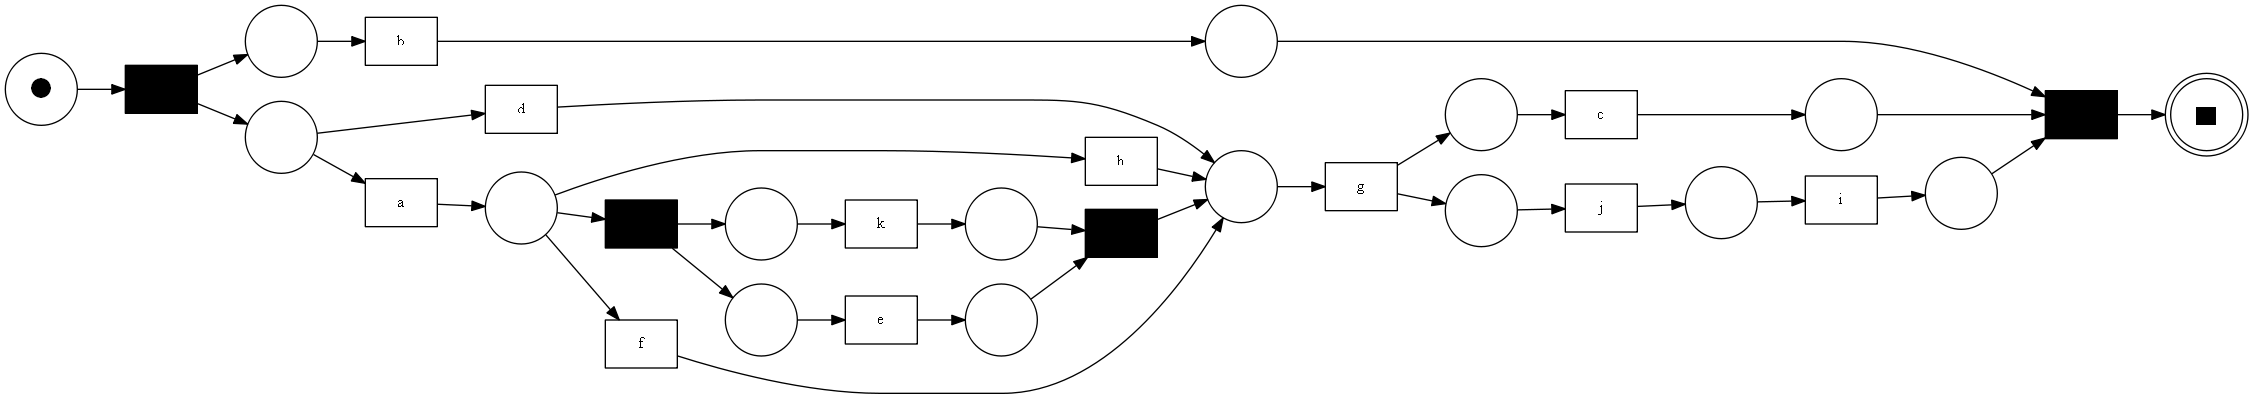

------------------- PARALLEL: 0.3 -------------------
percentages sequence, choice, parallel [0.5, 0.2, 0.3]
Number of variants: 160
Min length:  7
Max length:  13


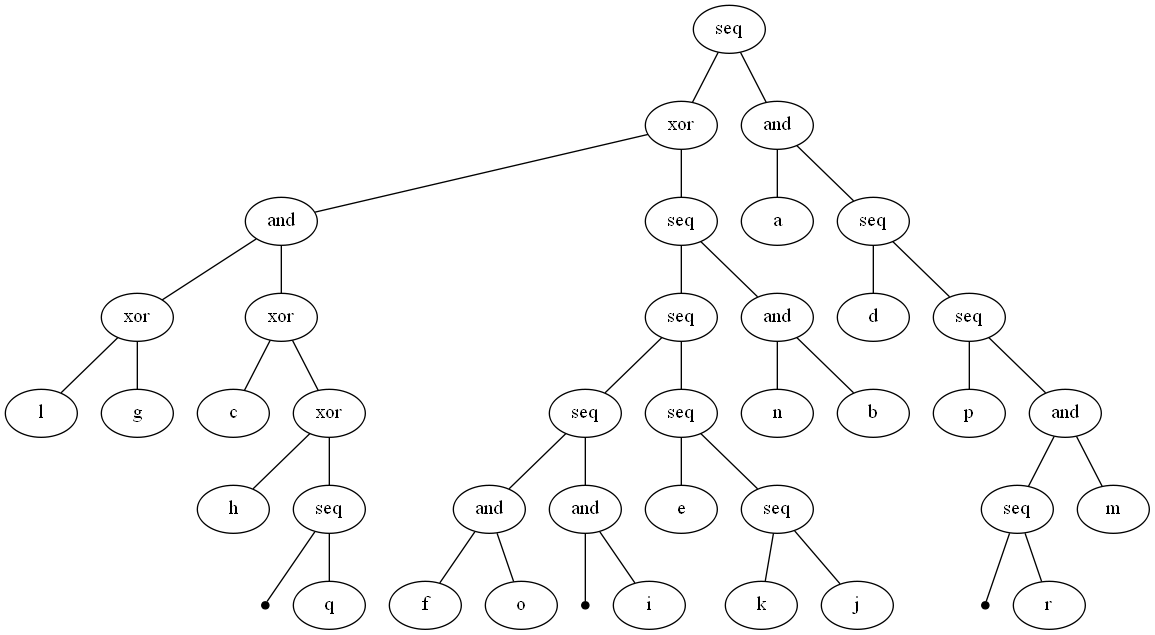

Number of act.: 18


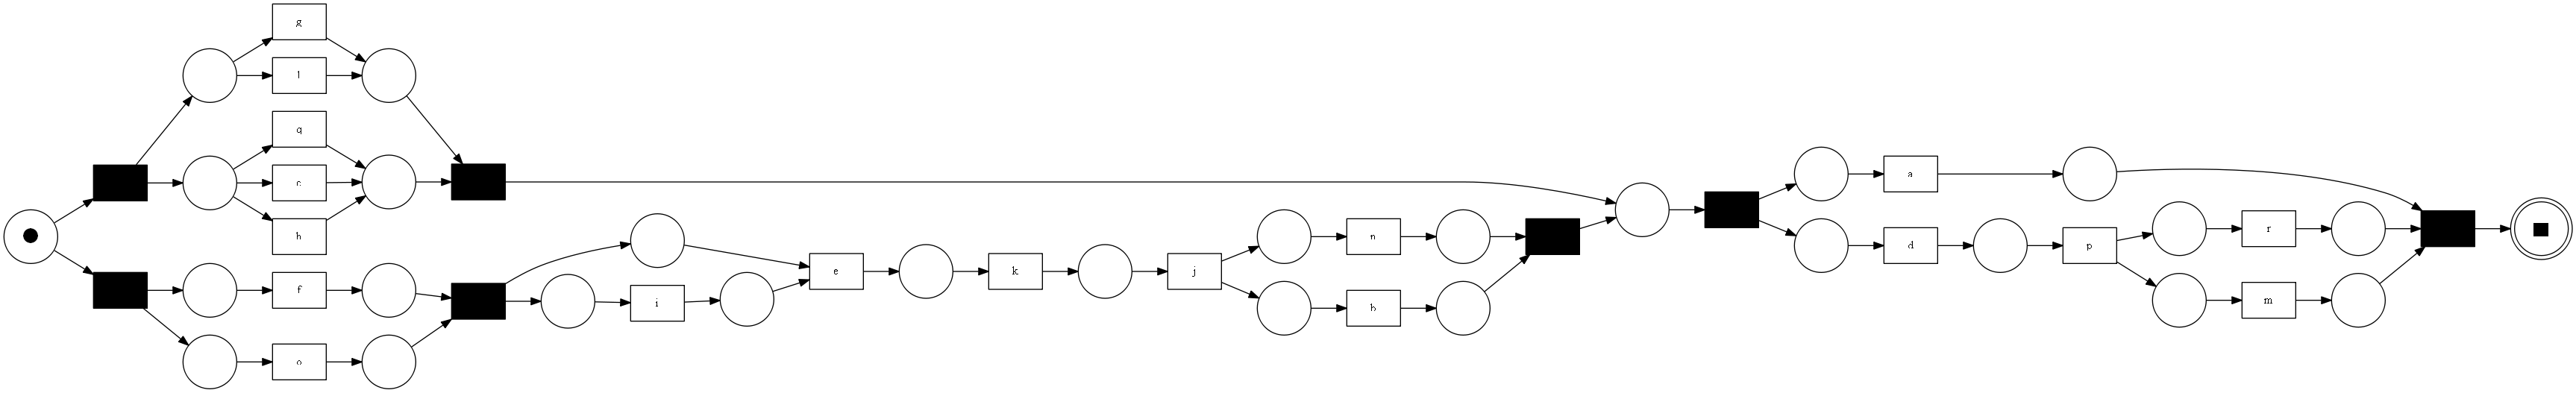

------------------- PARALLEL: 0.35 -------------------
percentages sequence, choice, parallel [0.5, 0.15, 0.35]
Number of variants: 140
Min length:  8
Max length:  13


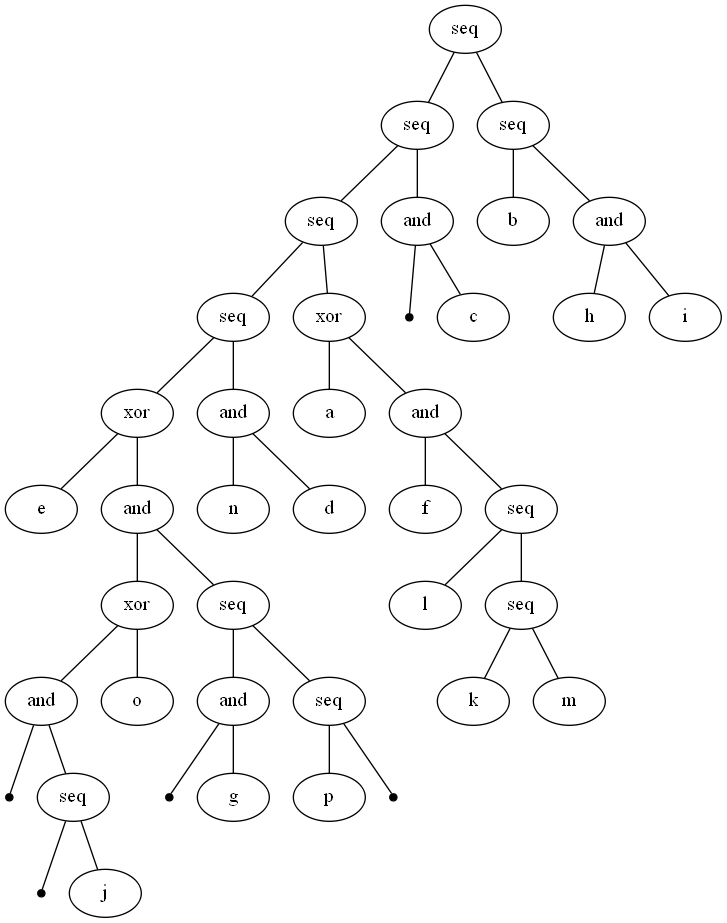

Number of act.: 16


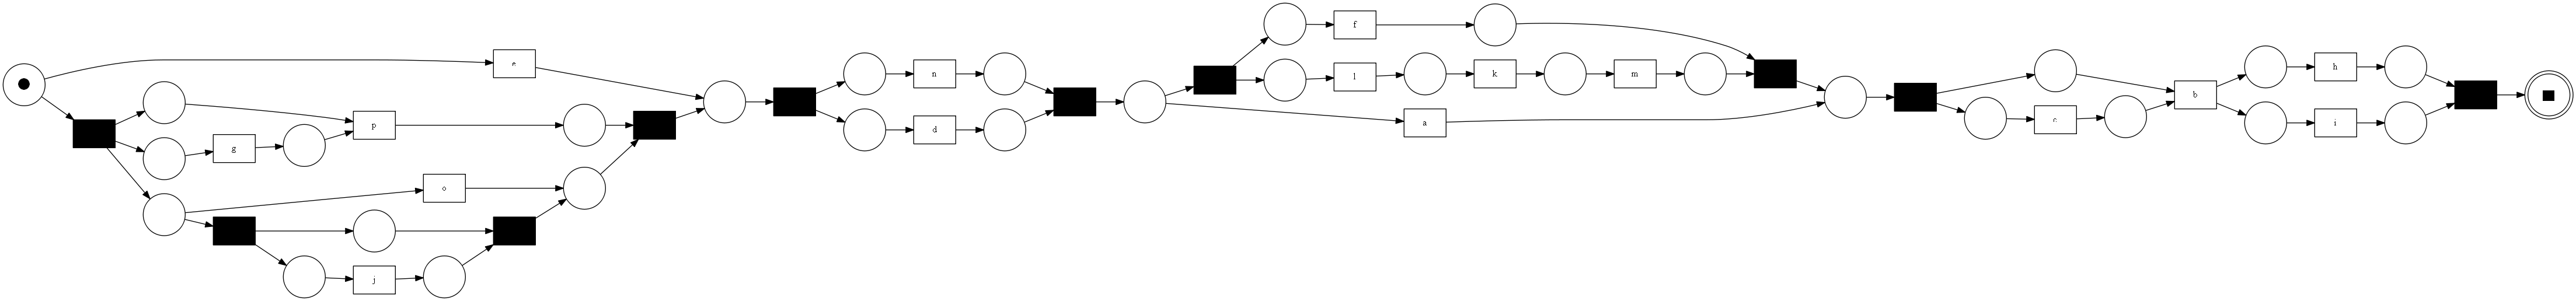

------------------- PARALLEL: 0.4 -------------------
percentages sequence, choice, parallel [0.5, 0.1, 0.4]
Number of variants: 120
Min length:  9
Max length:  11


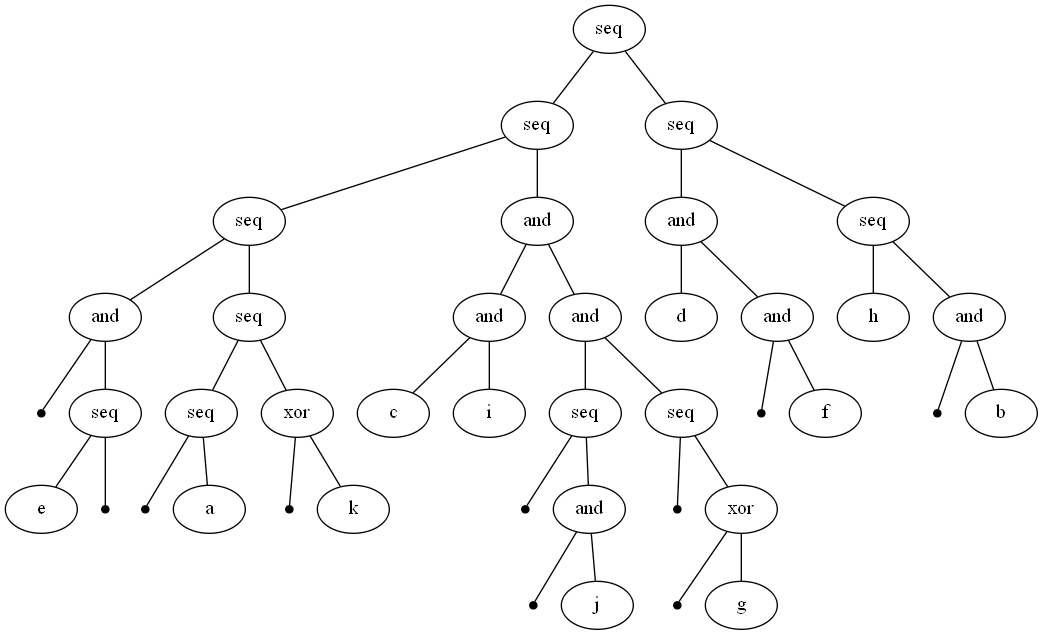

Number of act.: 11


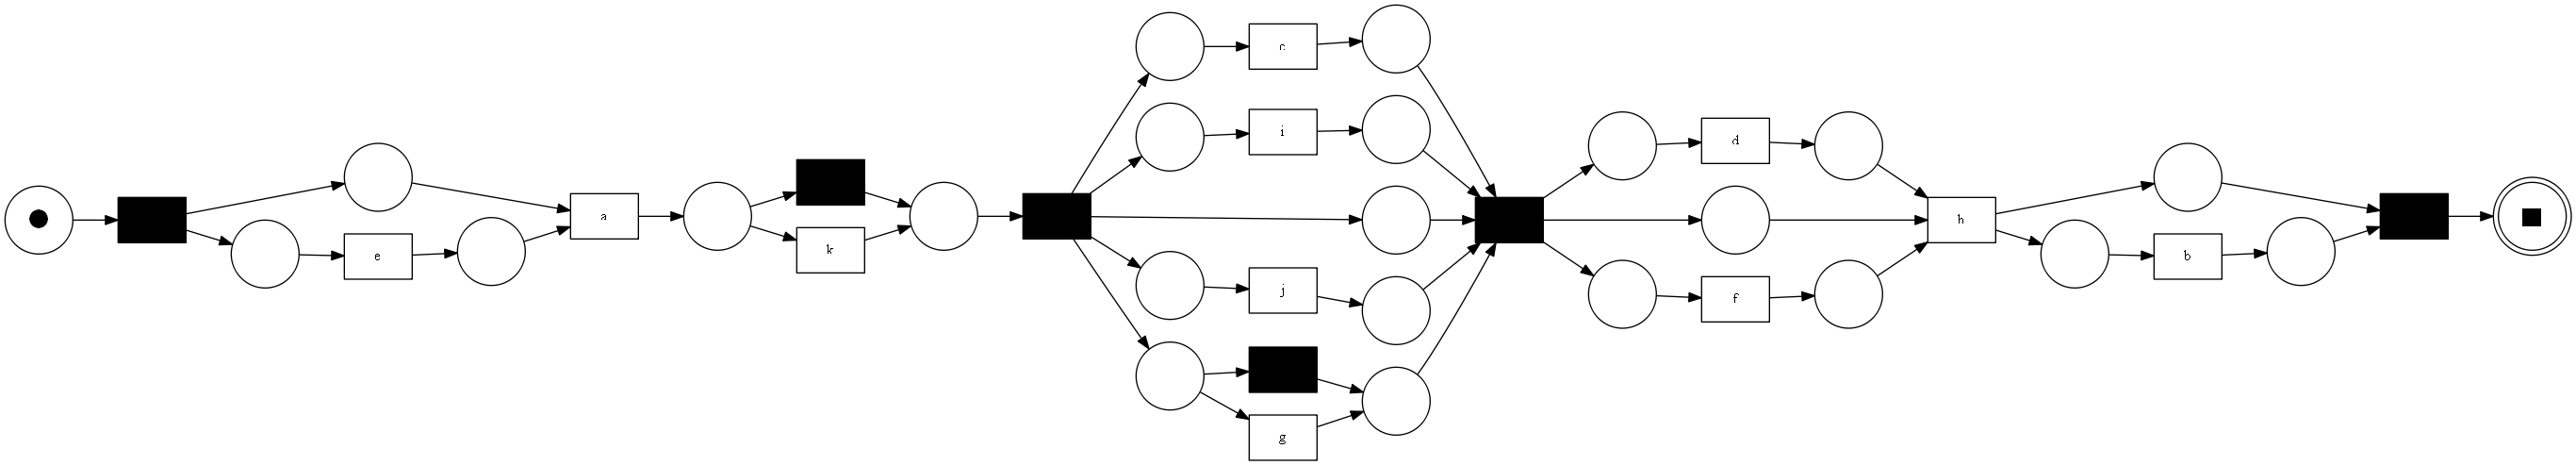

------------------- PARALLEL: 0.45 -------------------
percentages sequence, choice, parallel [0.5454545454545454, 0.0, 0.45454545454545453]
Number of variants: 120
Min length:  11
Max length:  11


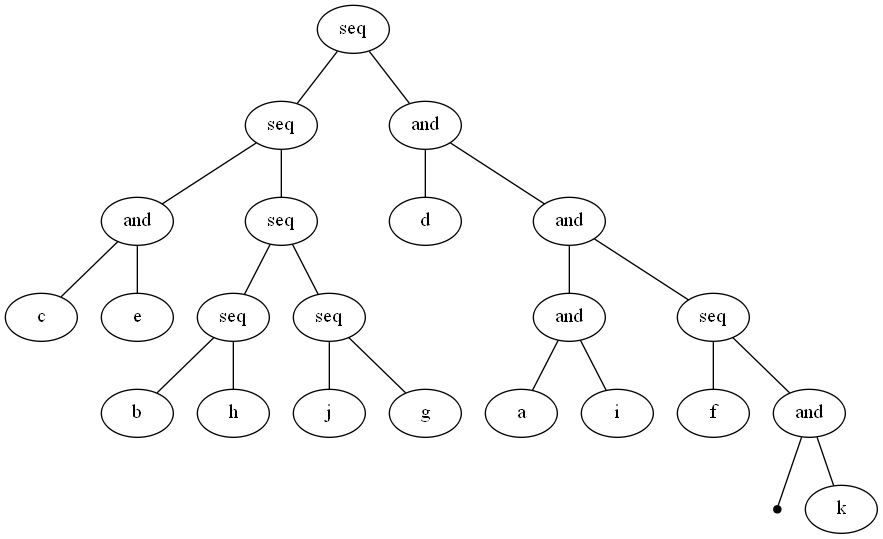

Number of act.: 11


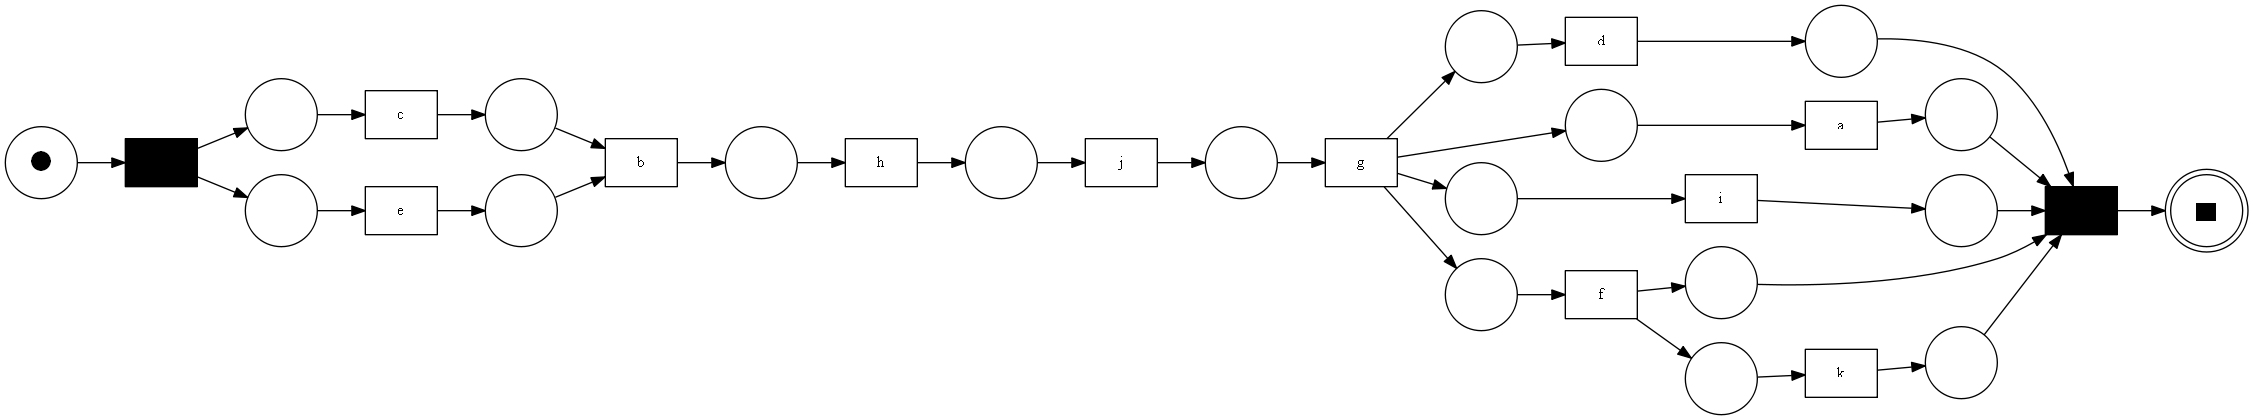

------------------- PARALLEL: 0.5 -------------------
percentages sequence, choice, parallel [0.5, 0.0, 0.5]
Number of variants: 144
Min length:  11
Max length:  11


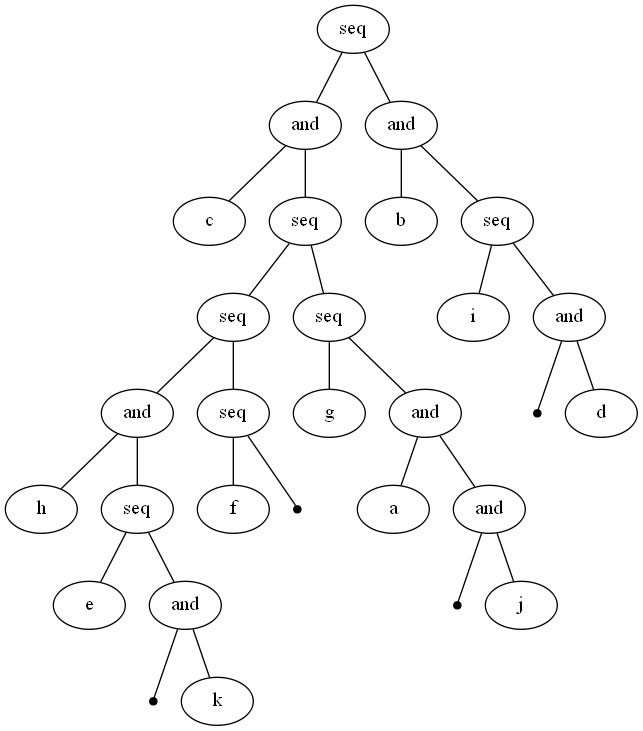

Number of act.: 11


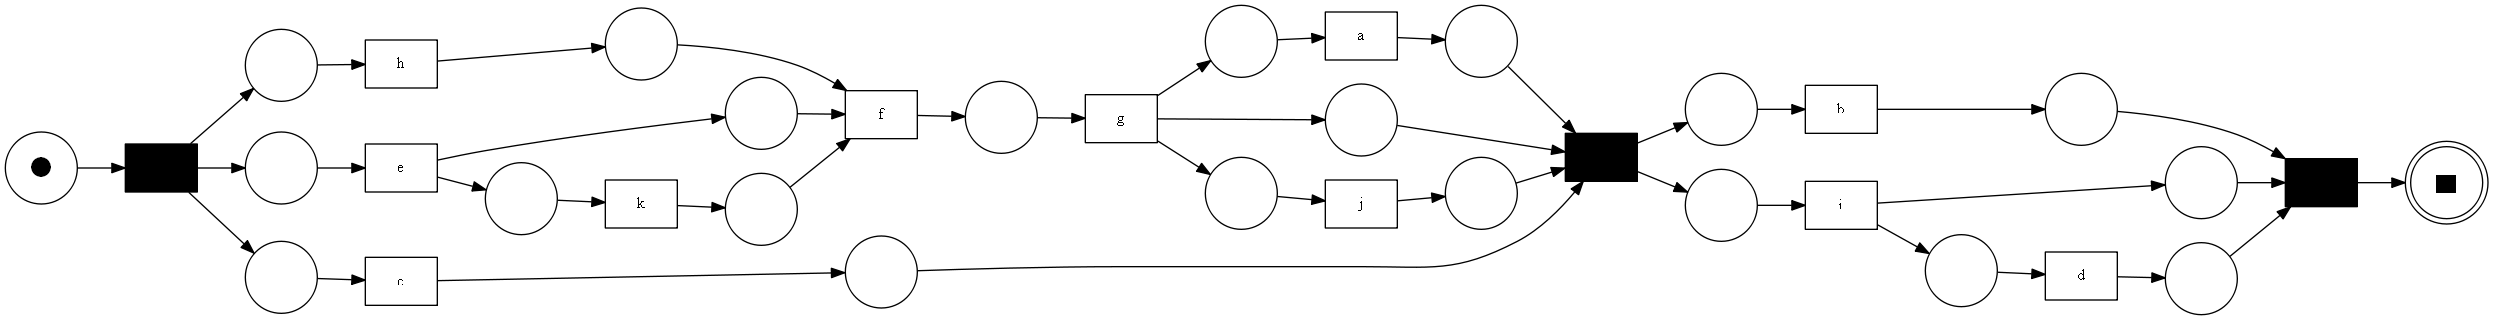

In [8]:
parallel_options = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

for parallel in parallel_options:
    print("------------------- PARALLEL:", parallel, "-------------------")
    filename_tree = "Trees/tree_par" + "{:.2f}".format(parallel)[2:] + ".ptml"
    filename_PN = "Nets/PN_par" + "{:.2f}".format(parallel)[2:] + ".pnml"
    
    tree = ptml_importer.apply(filename_tree)
    
    print("percentages sequence, choice, parallel", get_percentages_tree(tree))
    
    playout_variant = tree_playout.Variants.EXTENSIVE
    param = tree_playout.Variants.EXTENSIVE.value.Parameters
    variants = tree_playout.apply(tree, variant=playout_variant, parameters={param.MAX_TRACE_LENGTH: 200, param.MAX_LOOP_OCC: 3, param.MAX_LIMIT_NUM_TRACES: 200})
    print("Number of variants:", len(variants))
    
    print("Min length: ", min(map(len, variants)))
    print("Max length: ", max(map(len, variants)))
    
    gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
    pt_visualizer.view(gviz)
    
    net, im, fm = pt_converter.apply(tree)
    
    print("Number of act.:", len(get_alphabet(net)))
    
    
       
    gviz = pn_visualizer.apply(net, im, fm)
    pn_visualizer.view(gviz)
    
    pnml_exporter.apply(net, im, filename_PN)
    
